In [91]:
import pandas as pd

# **Reading Csv**

In [92]:
url=   'https://drive.google.com/file/d/1oGhfix3rs1qGzVIx657qUcvmS4PUHREs/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data=   pd.read_csv(path)

In [93]:
from sklearn import set_config
set_config(transform_output='pandas')

# **Importing pandas libraries**

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [95]:
data # checking the csv file content

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,11250,68.0,920,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,9550,60.0,756,3,1,0,3,0,0,0,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,14260,84.0,1145,4,1,0,3,192,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,13175,85.0,1542,3,2,0,2,349,0,0,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,9042,66.0,1152,4,2,0,1,0,0,1,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,9717,68.0,1078,2,0,0,1,366,0,0,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [96]:
data.info() # checking columns,very huge set of columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   Expensive      1460 non-null   int64  
 10  MSZoning       1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Heating        1460 non-null   object 
 13  Street         1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Foundation     1460 non-null   object 
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  BsmtQual

In [97]:
# X and y creation
X = data.drop(['Id'],axis=1)
y = X.pop('Expensive')

In [98]:
# data splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [99]:
X_cat_col = X.select_dtypes(exclude="number").copy().columns
X_num_col = X.select_dtypes(include="number").copy().columns

In [100]:
numeric_pipe =make_pipeline(
    SimpleImputer(strategy='mean'))


In [101]:
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown="ignore",sparse_output=False)
)

In [102]:
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer())])

In [103]:
categoric_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='N_A', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [104]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num_col),
        ("cat_pipe", categoric_pipe, X_cat_col),
    ]
)

# **2.Modelling (Decision Tree)**

In [105]:
from sklearn.model_selection import GridSearchCV

full_pipeline=make_pipeline(preprocessor,
                            DecisionTreeClassifier())

In [106]:
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}

In [107]:
search=GridSearchCV(full_pipeline,
                    param_grid,
                    cv=5,
                    verbose=1,
                    scoring='accuracy')

In [108]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAd...
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'decisiontreeclassifier__max_depth': range(2, 14, 2),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 12, 2)},
             scoring='accuracy', verbose=1)

In [109]:
tree_score=accuracy_score(y_test,search.predict(X_test))

In [110]:
search.best_score_

0.9272403800300795

In [111]:
scores = pd.DataFrame({"model" : ['dtree'],"score":[tree_score]})

In [112]:
scores

,model,score
0,dtree,0.934932


# **3.Error analysis**

In [113]:
#test accuracy
accuracy_score(search.predict(X_test),y_test)

0.934931506849315

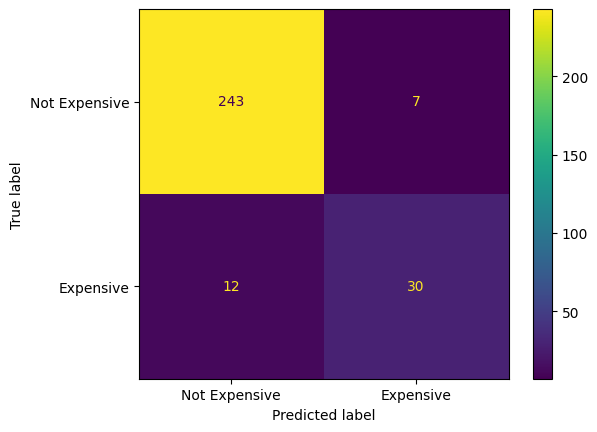

In [114]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search, 
                                      X_test, 
                                      y_test, 
                                      display_labels=['Not Expensive', 'Expensive']);

Creating full pipeline

In [115]:
full_pipeline=make_pipeline(preprocessor,
                            DecisionTreeClassifier()).set_output(transform='pandas')

In [116]:
full_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1'...
       'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2',
       'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [117]:
full_pipeline.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1'...
       'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2',
       'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

# **Adding Train csv**

In [118]:
url='https://drive.google.com/file/d/1YxeVDZHfDhqWb0VOn-lfxnDKoLOayJeD/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
train =   pd.read_csv(path)

In [119]:
train

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,11250,68.0,920,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,9550,60.0,756,3,1,0,3,0,0,0,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,14260,84.0,1145,4,1,0,3,192,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,13175,85.0,1542,3,2,0,2,349,0,0,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,9042,66.0,1152,4,2,0,1,0,0,1,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,9717,68.0,1078,2,0,0,1,366,0,0,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   Expensive      1460 non-null   int64  
 10  MSZoning       1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Heating        1460 non-null   object 
 13  Street         1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Foundation     1460 non-null   object 
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  BsmtQual

In [121]:
X = train.drop(columns=['Id'])
y=X.pop('Expensive')

In [122]:
train_pred= full_pipeline.predict(train)

In [123]:
train_pred

array([0, 0, 0, ..., 1, 0, 0])

# Adding test csv **

In [124]:
url=   'https://drive.google.com/file/d/1yHqaGhmHCu4wCG5ew7dBhu-4kvoSvz-i/view?usp=drive_link'#test.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
test =  pd.read_csv(path)

In [125]:
test

,Id,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1461,11622,80.0,882.0,2,0,0,1.0,140,120,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,1462,14267,81.0,1329.0,3,0,0,1.0,393,0,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,1463,13830,74.0,928.0,3,1,0,2.0,212,0,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,1464,9978,78.0,926.0,3,1,0,2.0,360,0,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,1465,5005,43.0,1280.0,2,0,0,2.0,0,144,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,1936,21.0,546.0,3,0,0,0.0,0,0,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1455,2916,1894,21.0,546.0,3,0,0,1.0,0,0,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1456,2917,20000,160.0,1224.0,4,1,0,2.0,474,0,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1457,2918,10441,62.0,912.0,3,0,0,0.0,80,0,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [126]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   LotArea        1459 non-null   int64  
 2   LotFrontage    1232 non-null   float64
 3   TotalBsmtSF    1458 non-null   float64
 4   BedroomAbvGr   1459 non-null   int64  
 5   Fireplaces     1459 non-null   int64  
 6   PoolArea       1459 non-null   int64  
 7   GarageCars     1458 non-null   float64
 8   WoodDeckSF     1459 non-null   int64  
 9   ScreenPorch    1459 non-null   int64  
 10  MSZoning       1455 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Heating        1459 non-null   object 
 13  Street         1459 non-null   object 
 14  CentralAir     1459 non-null   object 
 15  Foundation     1459 non-null   object 
 16  ExterQual      1459 non-null   object 
 17  ExterCond      1459 non-null   object 
 18  BsmtQual

In [127]:
#just for reference as here getting error
#X = data.drop(columns=["PassengerId", "Name", "Ticket"])

In [128]:
X = test.drop(columns=['Id.1'])

In [129]:
id_column=test.pop('Id')

In [130]:
test_pred= full_pipeline.predict(test)

In [131]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

# **final submission file**

In [132]:
submission_file= pd.DataFrame({'Id':id_column,'Expensive':test_pred})

In [133]:
submission_file

,Id,Expensive
0,1461,0
1,1462,0
2,1463,0
3,1464,0
4,1465,0
...,...,...
1454,2915,0
1455,2916,0
1456,2917,0
1457,2918,0


In [134]:
from google.colab import files
submission_file.to_csv('filename.csv',index=False)
files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>